In [42]:
#==================================================
# Import libraries & set seed
#==================================================
import os

import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import time

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


# Other sklearn funcitonality
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score # classificatoin problem 
from sklearn.metrics import roc_curve # classificatoin problem
from sklearn.metrics import confusion_matrix # classificatoin problem

from sklearn.metrics import r2_score # Regression problem
from sklearn.metrics import mean_squared_error

from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve


pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
np.random.seed(42)

## Set metrics

In [3]:
SCORING_METRIC = 'neg_mean_squared_error' # Update
N_JOBS = -1

## Read and investigate data

### Read the data

In [4]:
#Loading the relevant data
base_path = os.path.dirname(os.getcwd())
file_path = os.path.join(base_path, "data")
file_name = "train.csv"

data_destination_train = os.path.join(file_path, file_name) # Full file path + name
raw_data=pd.read_csv(data_destination_train,keep_default_na=False,na_values='')

print(str(raw_data.shape))
raw_data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [6]:
# Load test dataset - we will perform the same transformations we are making to the training dataset in parallel
# in order be able to run the model on it at the end
file_name = "test.csv"
data_destination_test = os.path.join(file_path, file_name) # Full file path + name
raw_data_test=pd.read_csv(data_destination_test,keep_default_na=False,na_values='')

print(str(raw_data_test.shape))
raw_data_test.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,CBlock,TA,TA,No,Rec,468,LwQ,144,270,882,GasA,TA,Y,SBrkr,896,0,0,896,0,0,1,0,2,1,TA,5,Typ,0,NA,Attchd,1961,Unf,1,730,TA,TA,Y,140,0,0,0,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1,1462,20,RL,81,14267,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108,TA,TA,CBlock,TA,TA,No,ALQ,923,Unf,0,406,1329,GasA,TA,Y,SBrkr,1329,0,0,1329,0,0,1,1,3,1,Gd,6,Typ,0,NA,Attchd,1958,Unf,1,312,TA,TA,Y,393,36,0,0,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74,13830,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,GLQ,791,Unf,0,137,928,GasA,Gd,Y,SBrkr,928,701,0,1629,0,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997,Fin,2,482,TA,TA,Y,212,34,0,0,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
3,1464,60,RL,78,9978,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20,TA,TA,PConc,TA,TA,No,GLQ,602,Unf,0,324,926,GasA,Ex,Y,SBrkr,926,678,0,1604,0,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998,Fin,2,470,TA,TA,Y,360,36,0,0,0,0,NA,NA,NA,0,6,2010,WD,Normal
4,1465,120,RL,43,5005,Pave,NA,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0,Gd,TA,PConc,Gd,TA,No,ALQ,263,Unf,0,1017,1280,GasA,Ex,Y,SBrkr,1280,0,0,1280,0,0,2,0,2,1,Gd,5,Typ,0,NA,Attchd,1992,RFn,2,506,TA,TA,Y,0,82,0,0,144,0,NA,NA,NA,0,1,2010,WD,Normal


In [7]:
# We see that the data contains many variables which have missing data-points
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-

### Plot data
* Plot the data and do a first selection and data exclusion
* Select which ivs that shall be included in the dummy data creation

In [84]:
# Select the type of variable based on variable description in data_description.txt
categorical_variables = [
    "MSSubClass",
    "MSZoning",
    "Street",
    "Alley",
    "LotShape",
    "LandContour",
    "Utilities",
    "LotConfig",
    "LandSlope",
    "Neighborhood",
    "Condition1",
    "Condition2",
    "BldgType",
    "HouseStyle",
    "OverallQual",
    "OverallCond",
    "RoofStyle",
    "RoofMatl",
    "Exterior1st",
    "Exterior2nd",
    "MasVnrType",
    "ExterQual",
    "ExterCond",
    "Foundation",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "Heating",
    "HeatingQC",
    "CentralAir",
    "Electrical",
    "BsmtFullBath", # This is a numerical variable but shall be grouped as categorical (probably non-linear)
    "BsmtHalfBath", # This is a numerical variable but shall be grouped as categorical (probably non-linear)
    "FullBath", # 
    "HalfBath", #
    "Bedroom", #
    "Kitchen", #
    "KitchenQual", 
    "TotRmsAbvGrd", #
    "Functional", 
    "Fireplaces" #
    "FireplaceQu",
    "GarageType",
    "GarageFinish",
    "GarageCars",
    "GarageQual",
    "GarageCond",
    "PavedDrive",
    "PoolQC",
    "Fence",
    "MiscFeature",
    "MoSold",
    "SaleType",
    "SaleCondition"
    

]

continous_variables = [
    "LotFrontage",
    "LotArea",
    "YearBuilt", # Need to investigate if this variable is linear or if binning shall be performed for some models
    "YearRemodAdd",
    "MasVnrArea",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "LowQualFinSF",
    "GrLivArea",
    "GarageYrBlt", # Need to investigate if this variable is linear or if binning shall be performed for some models
    "GarageArea",
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch",
    "PoolArea",
    "MiscVal",
    "YrSold" # Need to investigate if this variable is linear or if binning shall be performed for some models
]

# Add total area 1stFlrSF + 2ndFlrSF
# Add a total "PoarchArea" variable WoodDeckSF + OpenPorchSF + EnclosedPorch + 3SsnPorch + ScreenPorch

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


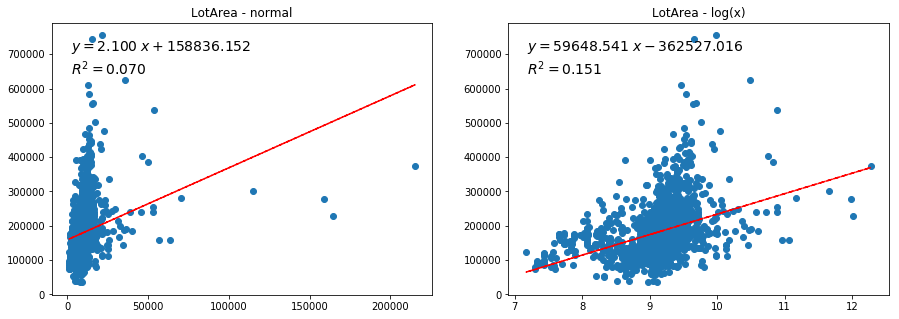

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


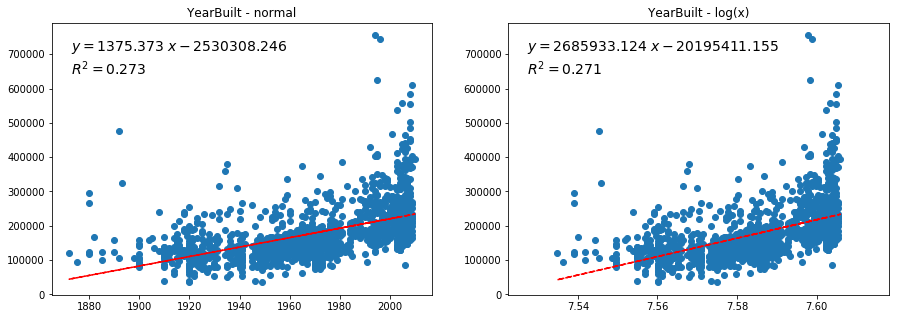

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


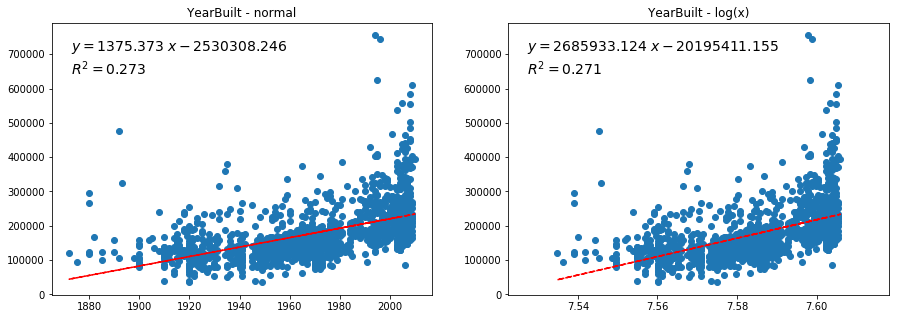

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


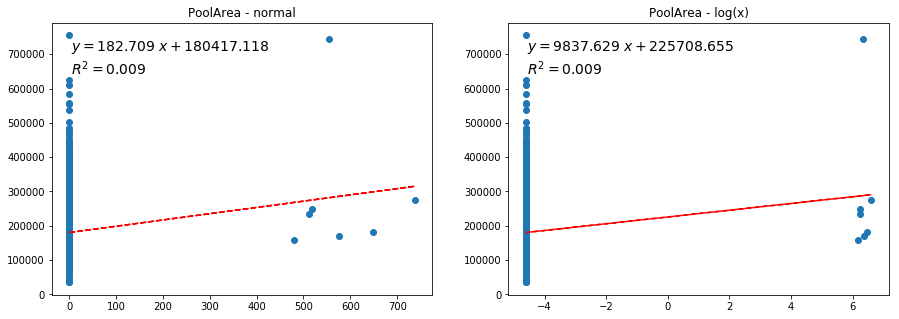

(0.008538415958697199, 0.008781398108915872)

In [91]:
# Define a function to plot continous variables
def plot_continous_variable(data,x_variable, y_variable="SalePrice"):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    
    # clean data for plotting
    x_raw = data[x_variable].copy()
    x_raw.loc[x_raw=="NA"] = 0.0
    x_raw = x_raw.fillna(0).astype(float)
    x_raw_log = x_raw.copy()
    x_raw_log.loc[x_raw_log==0] = 0.01 # Todo: look into this variable

    x = x_raw
    y = data[y_variable]
    ax1.scatter(x, y)

    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    y_hat = np.poly1d(z)(x)
    ax1.plot(x,p(x),"r--")
    r2_norm = r2_score(y,y_hat)

    text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_norm:0.3f}$"
    ax1.text(0.05, 0.95, text,transform=ax1.transAxes,
         fontsize=14, verticalalignment='top')
    ax1.set_title("{} - normal".format(x_variable))

    # logarithmic
    x_log = np.log(x_raw_log)
    y = data['SalePrice']
    ax2.scatter(x_log, y)

    z = np.polyfit(x_log, y, 1)
    p = np.poly1d(z)
    y_hat = np.poly1d(z)(x_log)
    ax2.plot(x_log,p(x_log),"r--")
    r2_log = r2_score(y,y_hat)
    
    text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_log :0.3f}$"

    ax2.text(0.05, 0.95, text,transform=ax2.transAxes,
         fontsize=14, verticalalignment='top')
    ax2.set_title("{} - log(x)".format(x_variable))

    plt.show()
    
    return r2_norm, r2_log

# Test to plot some of the variables
plot_continous_variable(raw_data,x_variable='LotArea')
plot_continous_variable(raw_data,x_variable='YearBuilt')
plot_continous_variable(raw_data,x_variable="PoolArea")

LotFrontage


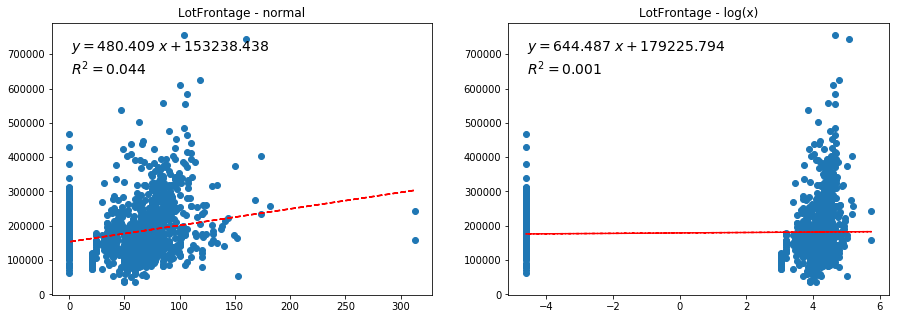

LotArea


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


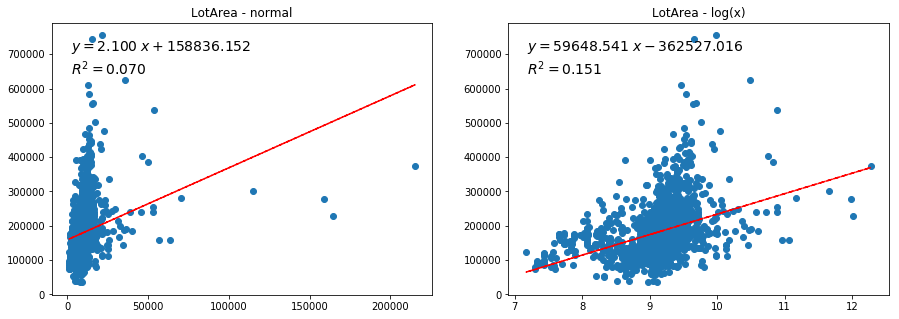

YearBuilt


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


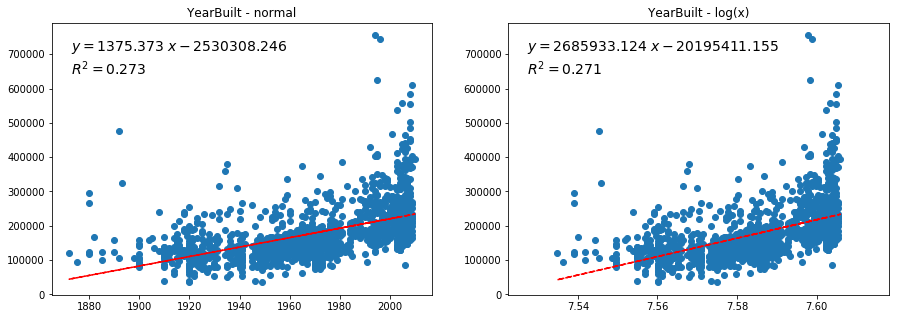

YearRemodAdd


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


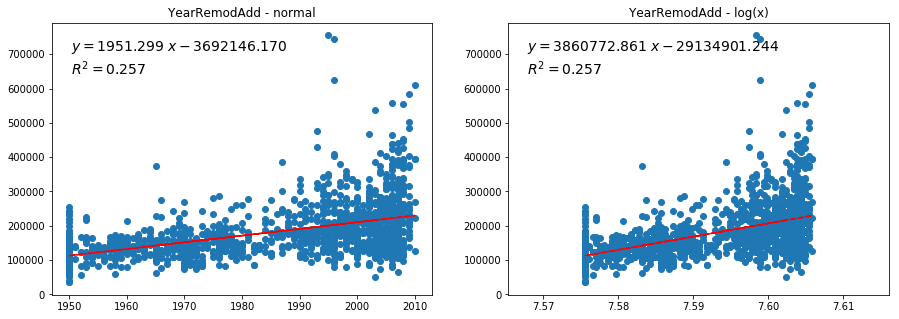

MasVnrArea


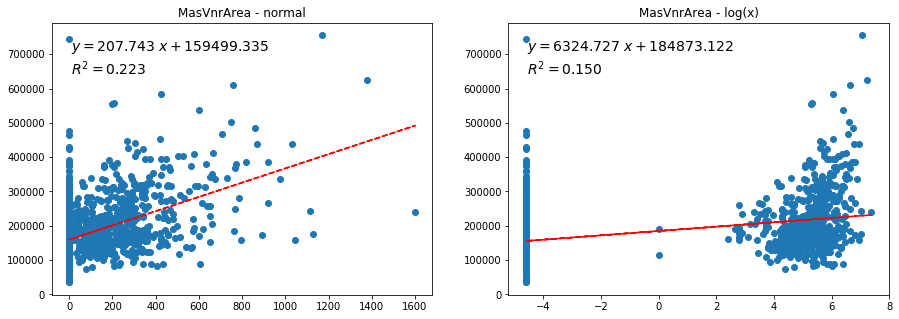

BsmtFinSF1


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


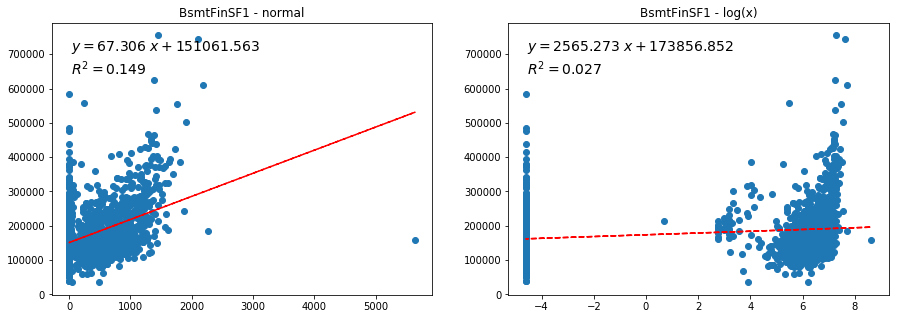

BsmtFinSF2


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


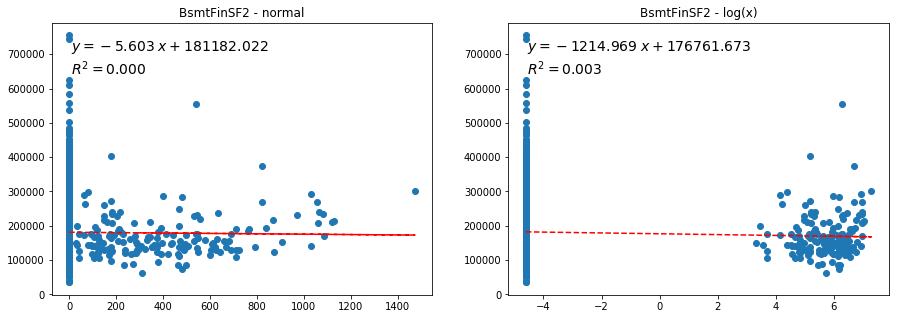

BsmtUnfSF


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


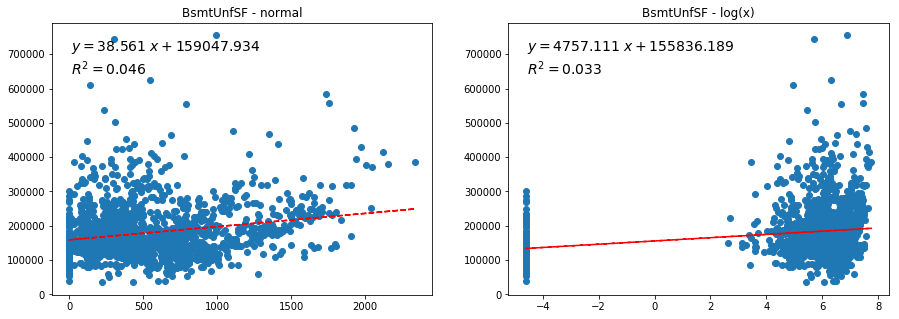

TotalBsmtSF


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


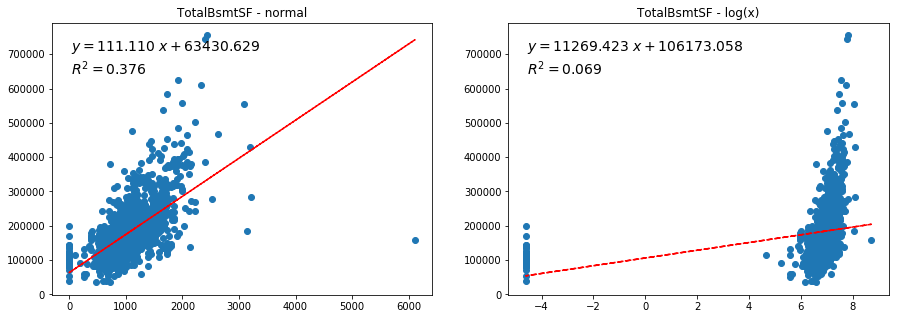

1stFlrSF


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


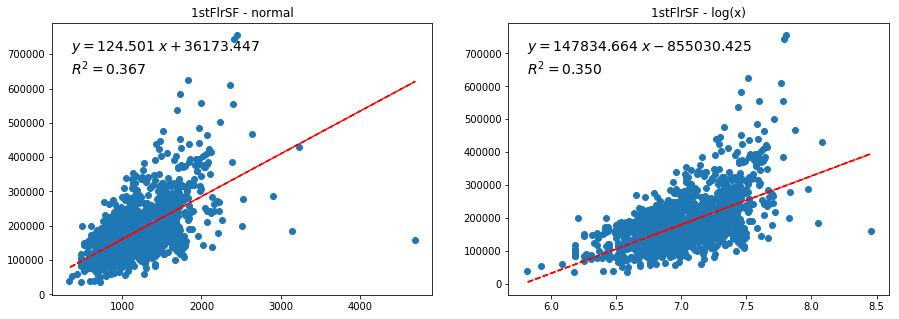

2ndFlrSF


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


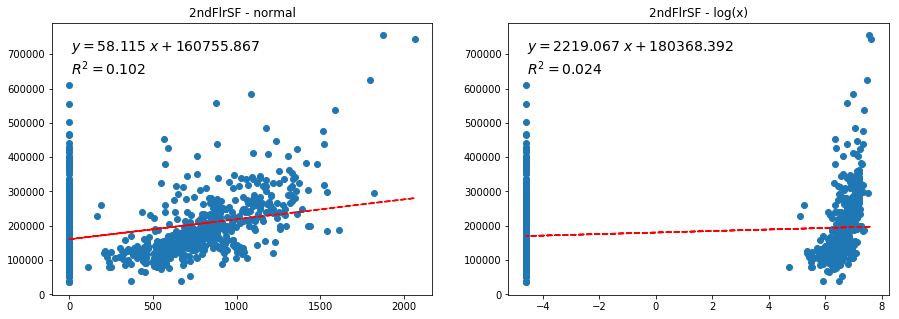

LowQualFinSF


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


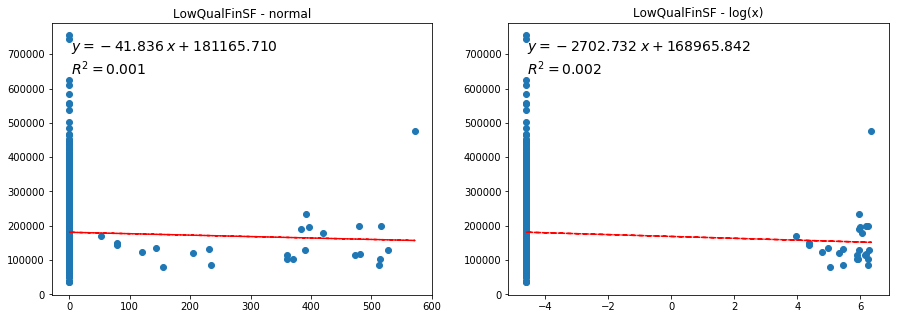

GrLivArea


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


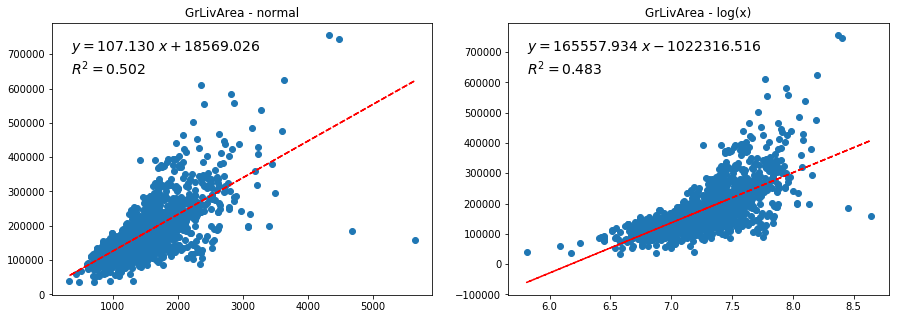

GarageYrBlt


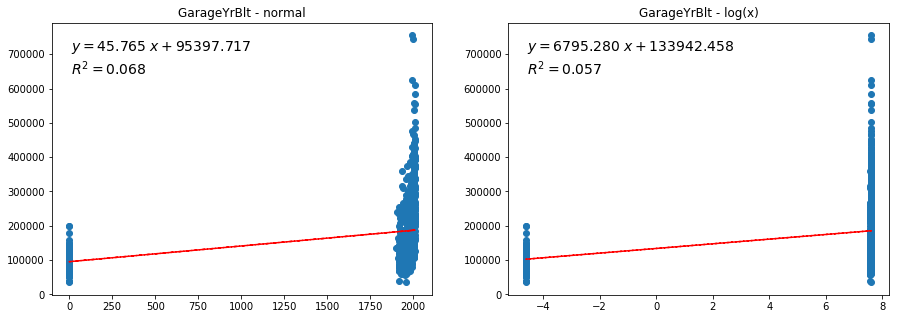

GarageArea


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


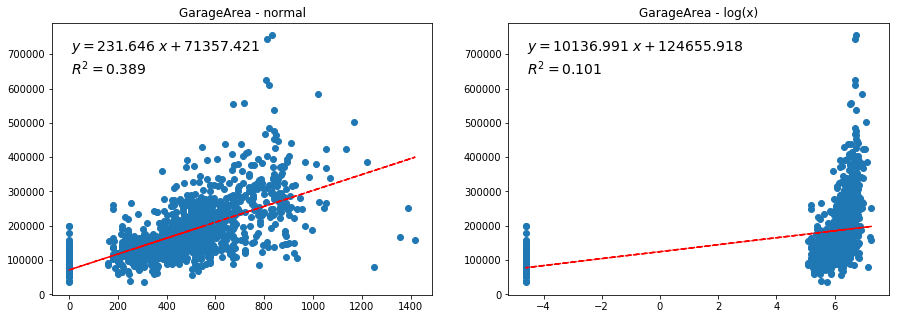

WoodDeckSF


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


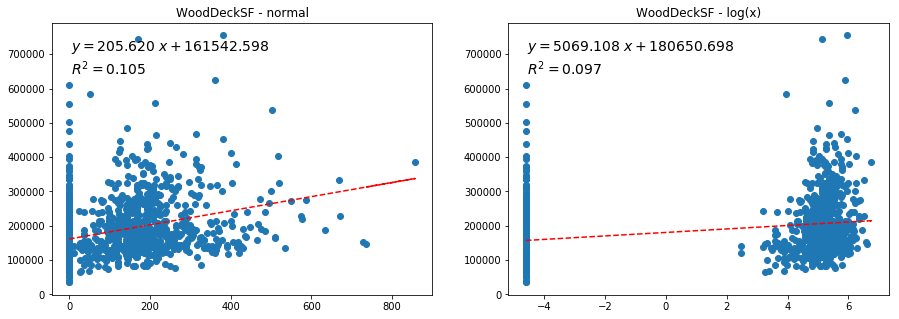

OpenPorchSF


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


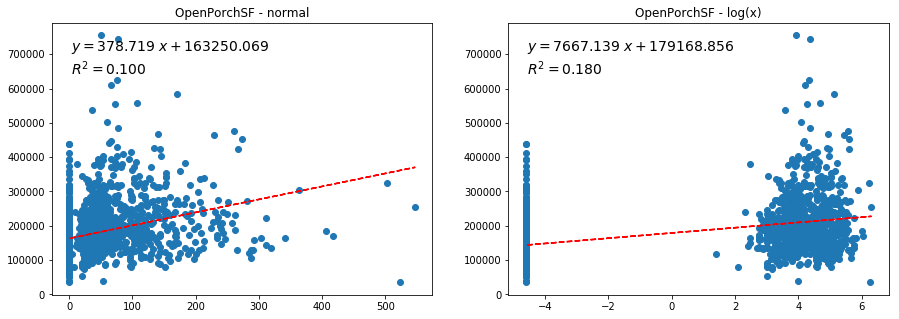

EnclosedPorch


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


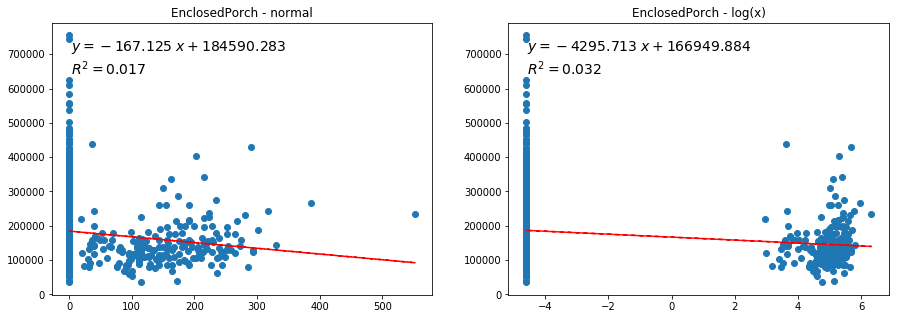

3SsnPorch


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


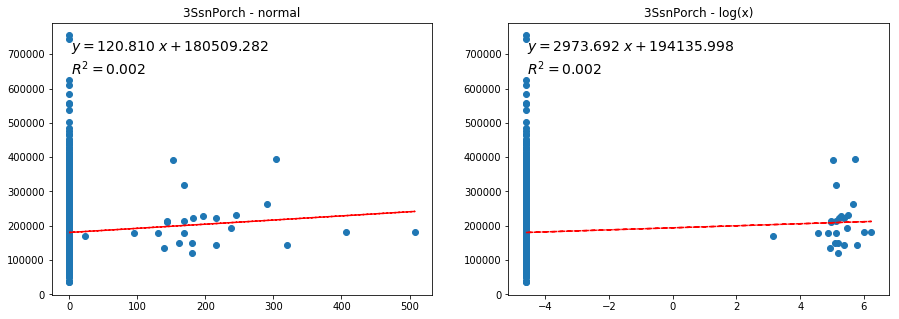

ScreenPorch


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


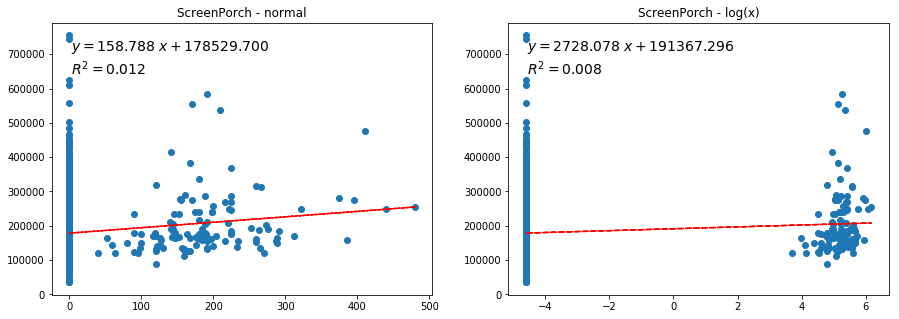

PoolArea


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


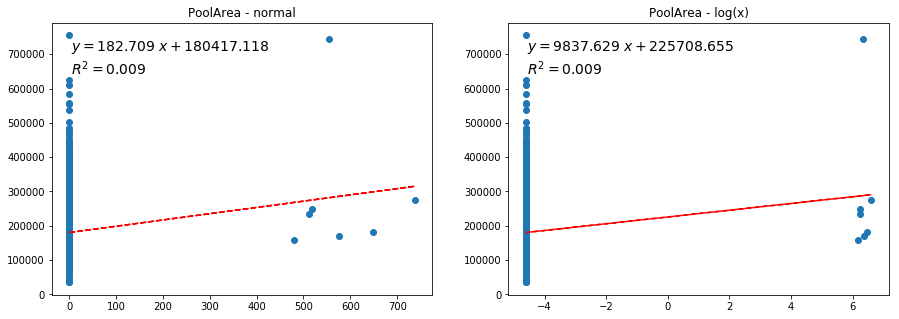

MiscVal


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


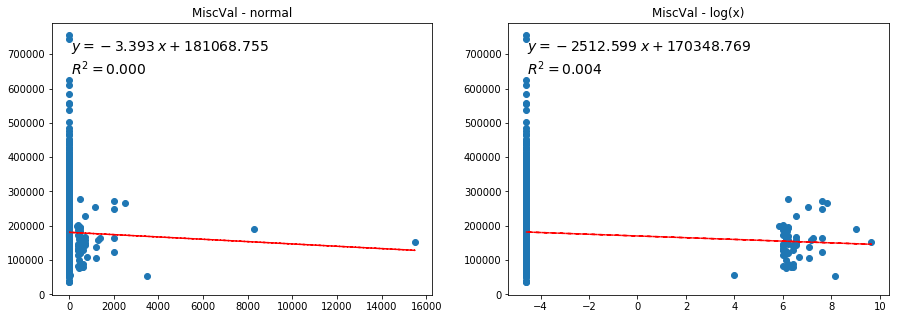

YrSold


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


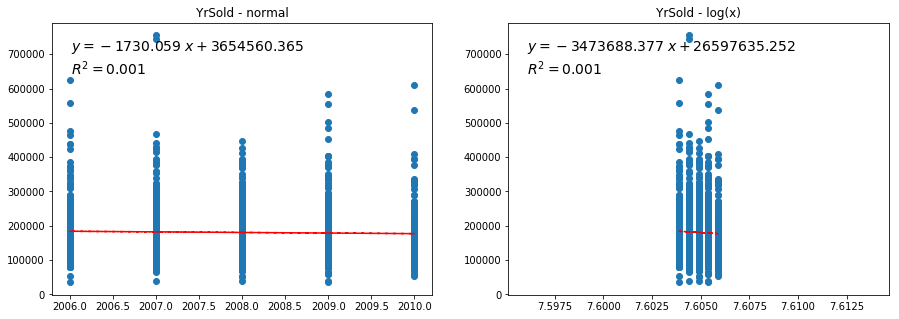

In [92]:
# Plot variable overview for all contionus variables
for variable_to_plot in continous_variables:
    print(variable_to_plot)
    plot_continous_variable(raw_data,x_variable=variable_to_plot)

## Data transformation function

In [35]:
# Create the function that cleane the data

# RefId will not be used in the training but shall be used to identify the data
data_identifier_name = "Id" #An unique ID are not a good predictor
dependent_variable = "SalePrice"

# functionality to drop/keep variables
drop_variables = True # A indicator if variable shall be dropped or kept in the data_cleaning
columns_to_drop = ['Alley', 'PoolQC', 'YrSold' ]
independent_columns_to_keep = [] # excluding id variable and dependent variable

# missing values inference
default_values_for_all_missing_continous_variables = True
missing_variables_to_fix = []


# functionality to create missing variables based on the average ratio between 2 variables
scale_functoinality_disabled = True
prices_to_scale = [
                    " TBU"
                    ]

price_to_scale_with = 'TBU'

def drop_variables(data_to_transform, columns_to_drop = [], independent_columns_to_keep = []):
    '''
    Drop the non needed columns
    '''
    if columns_to_drop:
        return data_to_transform.drop(columns_to_drop, axis = 1)
    else:
        independent_columns_to_keep.append(data_identifier_name)
        independent_columns_to_keep.append(dependent_variable)

def fix_missing_continous_variables(data_to_transform, fix_all = True, variables_to_drop = []):
    '''
    Fix missing continous variables by assigning the median value
    '''
    if fix_all:
        variables_to_drop = data_to_transform.columns[data_to_transform.dtypes != object]
        
    for col in variables_to_drop:
        data_to_transform[col].fillna(data_to_transform[col].median())
        
    return data_to_transform
    
    
def calculate_scaled_prices(data_to_transform, price_to_scale_with, prices_to_scale):
    average_price_to_scale = data_to_transform[prices_to_scale].mean()
    average_price_to_scale_with = data_to_transform[price_to_scale_with].mean()
    
    scale_factors = average_price_to_scale / average_price_to_scale_with
    
    for price_name in prices_to_scale:
        data_to_transform.loc[data_to_transform[price_name].isnull(), price_name] = data_to_transform[
            price_to_scale_with] * scale_factors[price_name]
        
    return data_to_transform


def calculate_price_ratios(data_to_transform, price_to_scale_with, prices_to_scale):
    '''
    Function that calculates the ratio between the different prices and the saleprice
    '''
    for price_variable in prices_to_scale:
        data_to_transform[price_variable + "_ratio"] = data_to_transform[
            price_variable]/data_to_transform[price_to_scale_with]
    
    return data_to_transform



def group_and_fix_missing_values_categorical_var(data_to_transform):
    '''
    Simple function to fill out missing data for the categorical funtions and to 
    group variables with less than XX entries together to create a less wide data 
    set when dummy variables are created
    '''
    categorical_columns = data_to_transform.columns[data_to_transform.dtypes == object]
    
    aggrigation_cut_off = 10
    
    for variable in categorical_columns:
        # replace missing values with OTHER
        data_to_transform.loc[data_to_transform[variable].isnull(), variable] = "OTHER"
        
        # group the variables together and replace the non frequent variables with OTHER
        variables_to_not_transform = (raw_data[variable].value_counts()>aggrigation_cut_off).index
        data_to_transform.loc[data_to_transform[variable].isin(variables_to_not_transform) == False, variable] = "OTHER"
     
    return data_to_transform


# TODO: fix create dummies funciton
def create_dummy_variables(data_to_transform, categorical_variables_to_keep, continous_variables_to_keep):
    
    # We now create dummy variables for the categorical variables
    data_continous = data_to_transform[continous_variables_to_keep]
    data_categorical = data_to_transform[categorical_variables_to_keep]

    #looping over the categorical variables and make them to "category" types
    for column in data_categorical.columns:
        data_categorical[column] = data_categorical[column].astype("category")

    # create dummy variables
    car_dummies = pd.get_dummies(data_categorical, drop_first=True)

    # create final data set
    merged_data = car_dummies.merge(data_continous, left_index=True, right_index=True, how='inner')
    
    return merged_data


def data_cleaning_transformations(train_data, test_data):
    
    id_train = train_data[data_identifier_name]
    id_test = test_data[data_identifier_name]
    
    full_data_for_scaling = pd.concat([train_data, test_data]).reset_index(drop=True)
    
    # Drop unnecicary data
    full_data_for_scaling = drop_variables(full_data_for_scaling, 
                                           columns_to_drop = columns_to_drop, 
                                           independent_columns_to_keep = independent_columns_to_keep)
    
    # Calculate the scaled prices
    if scale_functoinality_disabled == False:
        full_data_for_scaling = calculate_scaled_prices(full_data_for_scaling, price_to_scale_with, prices_to_scale)
        full_data_for_scaling = calculate_price_ratios(full_data_for_scaling, price_to_scale_with, prices_to_scale)
        
    # Fixing the missing values
    full_data_for_scaling = fix_missing_continous_variables(full_data_for_scaling, 
                                                            fix_all = default_values_for_all_missing_continous_variables, 
                                                            variables_to_drop = missing_variables_to_fix)
    full_data_for_scaling = group_and_fix_missing_values_categorical_var(full_data_for_scaling)
    
    # Todo: Update with only selected data for dummy creation (group dummies)
    # now create the dummy variables and drop the variables that is not needed 
    continous_variables_to_keep = full_data_for_scaling.columns[full_data_for_scaling.dtypes != object]
    categorical_variables_to_keep = full_data_for_scaling.columns[full_data_for_scaling.dtypes == object] 
    
    full_data_for_scaling = create_dummy_variables(full_data_for_scaling,
                                                   categorical_variables_to_keep,
                                                   continous_variables_to_keep)
    
    # split the data back to train and test data
    train_data = full_data_for_scaling.loc[full_data_for_scaling[data_identifier_name].isin(id_train)].reset_index(drop=True)
    test_data = full_data_for_scaling.loc[full_data_for_scaling[data_identifier_name].isin(id_test)].reset_index(drop=True)
    
    return train_data, test_data, id_test
    

In [36]:
train_data, test_data, id_test = data_cleaning_transformations(raw_data, raw_data_test)

print(train_data.shape)
print(test_data.shape)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:126: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(1460, 3525)
(1459, 3525)


## Train the model

### Create training split of data

In [11]:
# Get the dependent variable data
dv_data = train_data[dependent_variable]

# Create the independent variable dataframe that has all columns except for loan_approval_status
iv_data = train_data.drop(dependent_variable, axis=1)

# Create the test and train data sets
X_train, X_test, y_train, y_test = train_test_split(iv_data, dv_data, test_size=0.25)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1095, 3524) (1095,)
(365, 3524) (365,)


### First training iteration of model

Start training LinearRegression
Stop training LinearRegression. Time taken 1.749288558959961 s
Start training RandomForestRegressor
Stop training RandomForestRegressor. Time taken 0.9175479412078857 s


,LinearRegression,RandomForestRegressor
0,5.240990e-12,0.148999


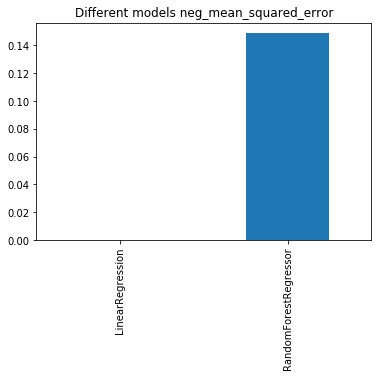

In [50]:
# Test multiple funcitons with GridSearchCV
# This method needs X_train and Y_train to be 

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

models_to_train = [LinearRegression(),
                  RandomForestRegressor()]

model_names = ['LinearRegression',
               "RandomForestRegressor"
              ]

best_models = []
best_model_mean_squared_error = []

parameters = {
    'LinearRegression':{
        'normalize':[False]
             },
    "RandomForestRegressor":{
        "n_estimators": [10],
        "max_depth": [5],
        "min_samples_split": [3],
    }
    }

# Find out the best model
for i in range(0,len(model_names)):
    
    
    act_model = models_to_train[i]
    act_model_name = model_names[i]
    print("Start training " + act_model_name)
    
    # Get the start time
    start_time = time.time()
    
    act_params = parameters[act_model_name]
    
    act_model = GridSearchCV(act_model, act_params, cv=5, scoring=SCORING_METRIC, n_jobs = N_JOBS)
    act_model.fit(X_train, y_train)

    act_best_model = act_model.best_estimator_
    best_models.append(act_best_model)
    
    best_model_mean_squared_error.append(np.sqrt(mean_squared_error(np.log(y_train), np.log(act_best_model.predict(X_train)))))
    
    # get the end time
    time_taken = time.time() - start_time
    print("Stop training " + act_model_name + ". Time taken {} s".format(time_taken))

# displaying the results
result_df = pd.DataFrame(best_model_mean_squared_error).T
result_df.columns = model_names
result_df = result_df[result_df.iloc[-1].sort_values(ascending=True).index]

result_df.T.plot(kind='bar', title = "Different models " + SCORING_METRIC, legend = False )
result_df.head()

In [49]:
# Use test data to check prediction precision
np.sqrt(mean_squared_error(np.log(y_test), np.log(act_best_model.predict(X_test))))


0.18340271609770994

In [13]:
X_train.describe()

,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Gd,BsmtCond_OTHER,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_OTHER,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_OTHER,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_OTHER,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_OTHER,BsmtQual_TA,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_OTHER,Electrical_SBrkr,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_OTHER,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_OTHER,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_OTHER,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_OTHER,FireplaceQu_Po,FireplaceQu_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_OTHER,Functional_Sev,Functional_Typ,GarageCond_Fa,GarageCond_Gd,GarageCond_OTHER,GarageCond_Po,GarageCond_TA,GarageFinish_OTHER,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_OTHER,GarageQual_Po,GarageQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_OTHER,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_OTHER,KitchenQual_TA,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Mod,LandSlope_Sev,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSZoning_FV,MSZoning_OTHER,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_OTHER,MasVnrType_Stone,MiscFeature_OTHER,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_P,PavedDrive_Y,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_OTHER,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa,Utilities_OTHER,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 1023 to 1126
Columns: 264 entries, BldgType_2fmCon to YrSold
dtypes: float64(11), int64(26), uint8(227)
memory usage: 567.8 KB


## Output creation
* Create output for submission to Kaggle competition

In [39]:
# Create output directory
base_path = os.path.dirname(os.getcwd())
file_path = os.path.join(base_path, "output_data")

if not os.path.exists(file_path):
    os.makedirs(file_path)

file_name = "test_submission_v0.csv"

test_predictions = act_best_model.predict(test_data.drop(dependent_variable, axis=1))

test_predictions_df = pd.DataFrame({"Id":id_test, "SalePrice":test_predictions})

test_predictions_df.to_csv(os.path.join(file_path,file_name), sep = ",", index=False)

test_predictions_df.head()

,Id,SalePrice
0,1461,120041.176516
1,1462,148538.680002
2,1463,152256.626763
3,1464,172104.783238
4,1465,216913.669903
